<a href="https://colab.research.google.com/github/garfield-gray/NeuralNetwork/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$
In\;the\;name\;of\;God
\\Project\;of\;ML
\\CNN
$$

# Problem 1

In [66]:
import tensorflow as tf
import numpy as np 
from matplotlib import pyplot as plt
import sklearn as sl
import seaborn as sb


In [44]:
(X_train,Y_train), (X_test, Y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [45]:
X_train.shape
# it's literally a tensor=)

(60000, 28, 28)

In [46]:
X_train[0][16][8]

189

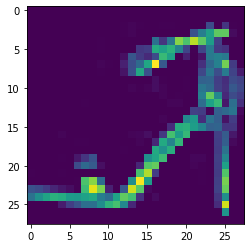

In [47]:
#to see how inputs look like:
plt.imshow(X_train[8], interpolation='nearest')
plt.show()

In [48]:
Y_train[6:20]

array([7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4], dtype=uint8)

this data set has 10 classes

In [49]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Activation, MaxPooling2D, Flatten


In [59]:
# Model
cnn = Sequential()
# Add convolution 2D
cnn.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(128, (3, 3), activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dense(10, activation='softmax'))


cnn.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
cnn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 flatten_6 (Flatten)         (None, 1152)             

In [60]:
#Wow! it takes lots of times!
history = cnn.fit(X_train, Y_train, validation_split=0.1,epochs = 50, batch_size = 128, verbose = 1)

Epoch 1/50
422/422 [==============================] - 34s 79ms/step - loss: 1.7794 - accuracy: 0.7715 - val_loss: 0.4799 - val_accuracy: 0.8360
Epoch 2/50
422/422 [==============================] - 33s 78ms/step - loss: 0.4042 - accuracy: 0.8550 - val_loss: 0.4057 - val_accuracy: 0.8562
Epoch 3/50
422/422 [==============================] - 35s 83ms/step - loss: 0.3362 - accuracy: 0.8768 - val_loss: 0.3724 - val_accuracy: 0.8648
Epoch 4/50
422/422 [==============================] - 33s 78ms/step - loss: 0.3027 - accuracy: 0.8894 - val_loss: 0.3794 - val_accuracy: 0.8668
Epoch 5/50
422/422 [==============================] - 33s 78ms/step - loss: 0.2745 - accuracy: 0.8971 - val_loss: 0.3539 - val_accuracy: 0.8768
Epoch 6/50
422/422 [==============================] - 33s 79ms/step - loss: 0.2552 - accuracy: 0.9060 - val_loss: 0.3322 - val_accuracy: 0.8843
Epoch 7/50
422/422 [==============================] - 35s 82ms/step - loss: 0.2389 - accuracy: 0.9117 - val_loss: 0.3702 - val_accuracy:

In [61]:
score = cnn.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8643333911895752
Test accuracy: 0.8901000022888184


In [75]:
Y_pred_float = cnn.predict_step(X_test)  
Y_pred_onehot = np.round(Y_pred_float)
Y_pred = np.argmax(Y_pred_onehot, axis=1)

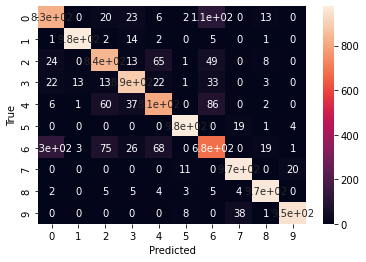

In [79]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_true=Y_test,y_pred=Y_pred)
sb.heatmap(CM,annot=True )
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [77]:
Y_pred.shape

(10000,)

In [78]:
Y_test.shape

(10000,)